# T1 map calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import warnings

from ukat.data import fetch
from ukat.mapping.t1 import T1

# Ensure figures are rendered in the notebook
%matplotlib inline

Tell python where to store the T1 maps NIfTI files we will generate. We will store it in a directory called
`t1_calculation_output` in the `tutorials` directory.

In [2]:
# Initialise output path for T1 map
OUTPUT_DIR = os.path.join(os.getcwd(), "t1_calculation_output")
OUTPUT_PATH_PHILIPS = os.path.join(OUTPUT_DIR, 'T1MapPHILIPS.nii.gz')

Retrieve T1 test data using our data fetcher.
This will return 3 variables:
* `image`: a 4D array with the magnitude data at all echo times.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `TIs`: an array containing the inversion times, in seconds.

In [3]:
# Fetch test data
image_philips, affine_philips, ti_philips = fetch.t1_philips()

Compute the T1 maps using the `T1` class implemented in `mapping`. By default this is executed over all available CPU cores
however this can be run single-threaded by setting `multithread=False` although will obviously take much longer.

In [6]:
ti_philips *= 1000  # convert TIs to ms
t1_results = T1(image_philips, ti_philips, multithread=True, parameters=2)


100%|██████████| 16384/16384 [01:50<00:00, 147.87it/s]


Display the parameters fit.

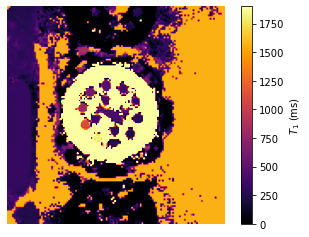

In [7]:
# Display the Philips T1 map
im = plt.imshow(t1_results.t1_map[..., 0], cmap='inferno', clim=(0, 1900))
cb = plt.colorbar(im)
cb.set_label('$T_1$ (ms)')
plt.axis('off')
plt.show()

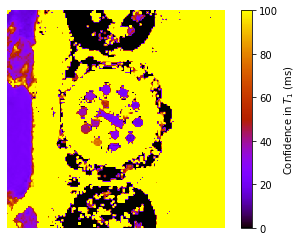

In [9]:
# Display the confidence in the fit of T1
im = plt.imshow(t1_results.t1_err[..., 0], cmap='gnuplot', clim=(0, 100))
cb = plt.colorbar(im)
cb.set_label('Confidence in $T_1$ (ms)')
plt.axis('off')
plt.show()

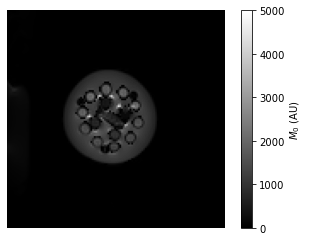

In [10]:
# Display the M0 map
im = plt.imshow(t1_results.m0_map[..., 0], cmap='gray', clim=(0, 5000))
cb = plt.colorbar(im)
cb.set_label('$M_0$ (AU)')
plt.axis('off')
plt.show()

Save the resulting T1 map as a NIfTI file:

In [11]:
# Make output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Save the T1 map to a new NifTI file
t1_nifti_object_philips = nib.Nifti1Image(t1_results.t1_map, affine=affine_philips)
nib.save(t1_nifti_object_philips, OUTPUT_PATH_PHILIPS)